LOCO, AT version


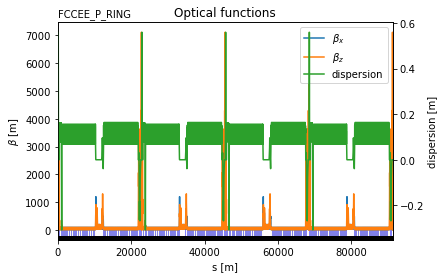

Execution time loading lattice: 13.708582401275635 sec


In [1]:
print(f"LOCO, AT version")
from at import *
from pylab import *
from at.load import load_mat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
from random import random
from copy import copy
from copy import deepcopy
from at import elements
from at_modules_loco import *
#from profiling_at_modules_loco import *
#ring=at.Lattice(ring1, energy=1)
t0_fullCode =  time.time()
t0 = time.time()

ring = at.load_mat('fccee_t_v22_b_c.mat', key='ring')
ring.radiation_off()
ring.plot_beta()

t1 = time.time()
print(f"Execution time loading lattice: {t1-t0} sec")

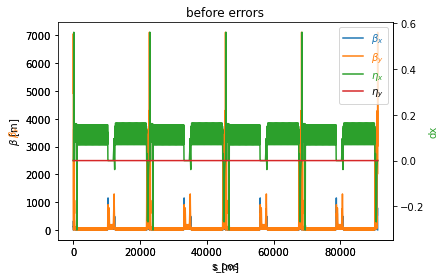

getOptics: 1.261643409729004 sec


In [2]:
t0 = time.time()
BPMs_random_noise = 0.0
twiss = getOptics(ring, at.elements.Monitor, BPMs_random_noise )
make_plot_all2(twiss, 'before errors')

t1 = time.time()
print(f"getOptics: {t1-t0} sec")

In [3]:
#Turn sextuplets off
sext_indexes = get_refpts(ring,at.elements.Sextupole)
for i in sext_indexes:
    ring[i].H=ring[i].H*0
#Save quads strengths
quad_indexes = get_refpts(ring, elements.Quadrupole)
quad_strengths_before = np.array([ring[ind].K for ind in quad_indexes])
t0 = time.time()
print("Choose Used correctors")
correctors_indexes = get_refpts(ring, elements.Corrector)
print("Total number of Correctors: ", len(correctors_indexes))
correctors_names = [ring[ind].FamName for ind in correctors_indexes]
used_correctors = used_cor(831, correctors_names)
print("Number of used Correctors: ", len(used_correctors))
t1 = time.time()
print(f"Execution time choose correctors: {t1-t0} sec")

Choose Used correctors
Total number of Correctors:  3324
Number of used Correctors:  4
Execution time choose correctors: 0.009973287582397461 sec


In [4]:
used_correctors

['CXY4', 'CXY5286', 'CXY10568', 'CXY15850']

In [5]:
print("Choose Used Quadrpoles Families")

t0 = time.time()

steps = 28 #use all quads individually
used_quadrpoles_families, used_quadrpoles_families_ind = used_quadrpoles_fcc(ring, steps)


t1 = time.time()
print(f"Execution time chose quadrpoles: {t1-t0} sec")

Choose Used Quadrpoles Families
# of QDG1: 36 # of QFG2: 40 # of QD1: 720 # of QF2: 720 # of QD3: 700 # of QF4: 696
102
Execution time chose quadrpoles: 0.24201536178588867 sec


In [6]:
used_quadrpoles_families_ind

[array([3252, 3268, 3280, 3300, 3312, 3328, 3344, 3356, 3376, 3388, 3404,
        3420, 3432, 3452, 3464, 3480, 3496, 3508, 3528, 3540, 3556, 3572,
        3584, 3604, 3616, 3632, 3648, 3660], dtype=uint32),
 array([3680, 3692, 3708, 3724, 3736, 3756, 3768, 3784, 3800, 3812, 3832,
        3844, 3860, 3876, 3888, 3908, 3920, 3936, 3952, 3964, 3984, 3996,
        4012, 4028, 4040, 4060, 4072, 4088], dtype=uint32),
 array([4104, 4116, 4136, 4148, 4164, 4180, 4192, 4212, 4224, 4240, 4256,
        4268, 4288, 4300, 4316, 4332, 4344, 4364, 4376, 4392, 4408, 4420,
        4440, 4452, 4468, 4484, 4496, 4516], dtype=uint32),
 array([4528, 4544, 4560, 4572, 4592, 4604, 4620, 4636, 4648, 4668, 4680,
        4696, 4712, 4724, 4744, 4756, 4772, 4788, 4800, 4820, 4832, 4848,
        4864, 4876, 4896, 4908, 4924, 4940], dtype=uint32),
 array([4952, 4972, 4984, 5000, 5016, 5028, 5048, 5060, 5076, 5092, 5104,
        5124, 5136, 5152, 5168, 5180, 5200, 5212, 5228, 5244, 5256, 5276,
        5288, 5304, 

QF
IP0, IP1: 8 QFG2, 179 QF2, 173 QF4
IP2, IP3: 8 QFG2, 179 QF2, 173 QF4
IP4, IP5: 8 QFG2, 179 QF2, 173 QF4
IP6, IP7: 8 QFG2, 179 QF2, 173 QF4
QD
IP0, IP1: 8 QDG1, 179 QD1, 173 QD3
IP2, IP3: 8 QDG1, 179 QD1, 173 QD3
IP4, IP5: 8 QDG1, 179 QD1, 173 QD3
IP6, IP7: 8 QDG1, 179 QD1, 173 QD3

In [7]:
# BPM_to_corrector_response_matrices (Model)

BPMs_random_noise = 0.0
t0 = time.time()
Cxx, Cxy= ORM_x(1.e-6, ring, BPMs_random_noise,used_correctors)
Cyy, Cyx= ORM_y(1.e-6, ring, BPMs_random_noise, used_correctors)
t1 = time.time()
print(f"Execution time ORMs: {t1-t0} sec")
print("orm dimensions: ", shape(Cxx))
print(norm(Cxy)) #check the coupling
print(norm(Cyx))
print(norm(Cxx))
print(norm(Cyy))

Execution time ORMs: 9.286197423934937 sec
orm dimensions:  (4, 3324)
0.0
0.0
1668.225515444474
45126.146525129116


In [8]:
dk =1.e-06

t0 = time.time()

C0x, C0y, C0xy, C0yx, dCx, dCy, dCxy,dCyx  = generatingQuadsResponse(ring, dk, Cxx, Cyy,Cxy, Cyx,BPMs_random_noise, used_quadrpoles_families_ind, CfamilyNames= used_correctors)

t1 = time.time()
print(f"Execution time generatingQuadsResponse: {t1-t0} sec")

generating response to family  1
Execution time: 9.59139895439148 sec
generating response to family  2
Execution time: 9.44475531578064 sec
generating response to family  3
Execution time: 9.728963613510132 sec
generating response to family  4
Execution time: 11.328541994094849 sec
generating response to family  5
Execution time: 10.110863447189331 sec
generating response to family  6
Execution time: 10.998673915863037 sec
generating response to family  7
Execution time: 11.239956855773926 sec
generating response to family  8
Execution time: 11.311768054962158 sec
generating response to family  9
Execution time: 11.130293130874634 sec
generating response to family  10
Execution time: 11.18616247177124 sec
generating response to family  11
Execution time: 11.132142305374146 sec
generating response to family  12
Execution time: 10.988627195358276 sec
generating response to family  13
Execution time: 11.247936487197876 sec
generating response to family  14
Execution time: 11.3656253814697

Execution time simulte erros: 0.007977962493896484 sec


Text(0, 0.5, '$\\Delta K[m^-2]$')

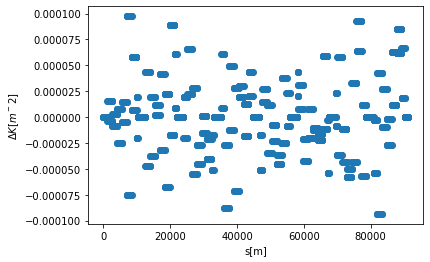

In [9]:
t0 = time.time()
gradErr = 2.e-3

simulateFixedGradientErrors(ring, gradErr, used_quadrpoles_families_ind)

t1 = time.time()
print(f"Execution time simulte erros: {t1-t0} sec")

#quads strengths after errors
quad_indexes = get_refpts(ring, elements.Quadrupole)
quad_strengths_after = np.array([ring[ind].K for ind in quad_indexes])
plt.scatter(twiss.s_pos, np.array(quad_strengths_before)- np.array(quad_strengths_after))
plt.xlabel("s[m]")
plt.ylabel("$\Delta K[m^-2]$")

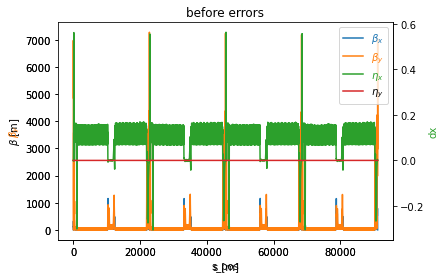

getOptics: 1.5738046169281006 sec


In [10]:
t0 = time.time()
BPMs_random_noise = 0.0
twiss_err = getOptics(ring, at.elements.Monitor, BPMs_random_noise )
make_plot_all2(twiss_err, 'before errors')

t1 = time.time()
print(f"getOptics: {t1-t0} sec")

In [11]:
#Measured orm

Cxx1, Cxy1= ORM_x(1.e-6, ring, BPMs_random_noise, used_correctors)
Cyy1, Cyx1= ORM_y(1.e-6, ring, BPMs_random_noise, used_correctors)

print(norm(Cxy)) #check the coupling
print(norm(Cyx))
print(norm(Cxx))
print(norm(Cyy))

0.0
0.0
1668.225515444474
45126.146525129116


iteration0:
Execution time define matrices function: 1.2356722354888916 sec
Execution time get inverse: 0.007975339889526367 sec
Execution time set correction: 0.012981653213500977 sec
beta beating with errors


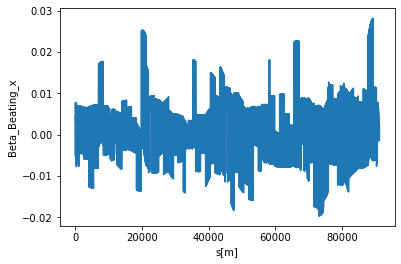

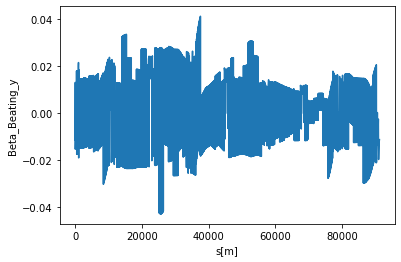

RMS beta beat, x:0.7479210128250531%   y: 1.4309202033170478%
STD beta beat, x:0.7470172170003083%   y: 1.4286094210200182%
beta beating after corrections


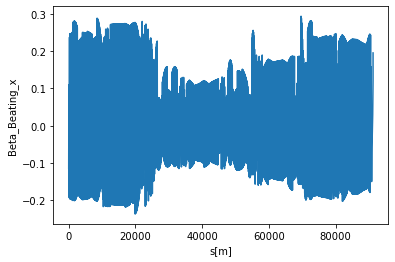

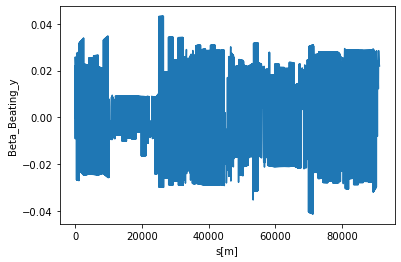

RMS beta beat, x:13.786394848974954%   y: 1.8698710415648165%
STD beta beat, x:13.654601524991234%   y: 1.8689786552822794%
betax_correction reduction -1743.295563645267
betax_correction reduction -30.67612276563201
iteration1:
Execution time define matrices function: 1.3782849311828613 sec
Execution time get inverse: 0.007978200912475586 sec
Execution time set correction: 0.009999752044677734 sec
beta beating with errors


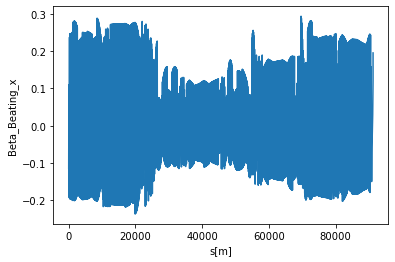

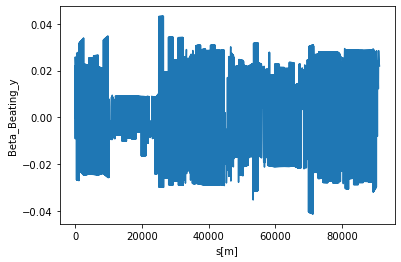

RMS beta beat, x:13.786394848974954%   y: 1.8698710415648165%
STD beta beat, x:13.654601524991234%   y: 1.8689786552822794%
beta beating after corrections


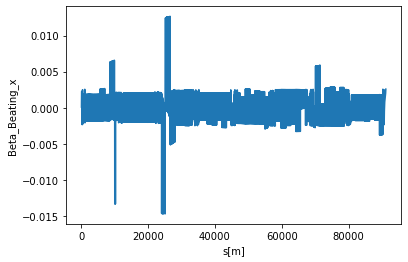

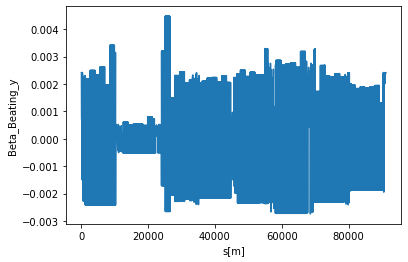

RMS beta beat, x:0.22002943600576066%   y: 0.16735248049022927%
STD beta beat, x:0.22002422134968894%   y: 0.16716540610665148%
betax_correction reduction 98.40401034196319
betax_correction reduction 91.05005228862314
iteration2:
Execution time define matrices function: 1.2695753574371338 sec
Execution time get inverse: 0.005983591079711914 sec
Execution time set correction: 0.01501321792602539 sec
beta beating with errors


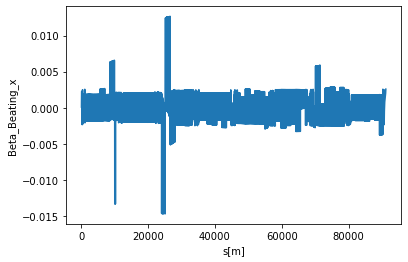

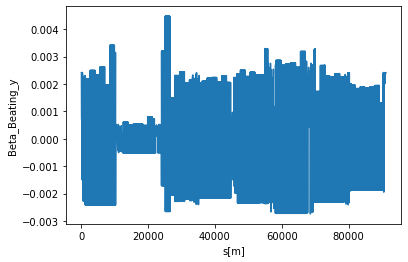

RMS beta beat, x:0.22002943600576066%   y: 0.16735248049022927%
STD beta beat, x:0.22002422134968894%   y: 0.16716540610665148%
beta beating after corrections


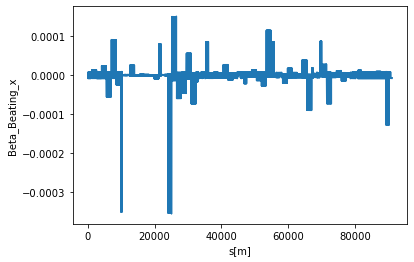

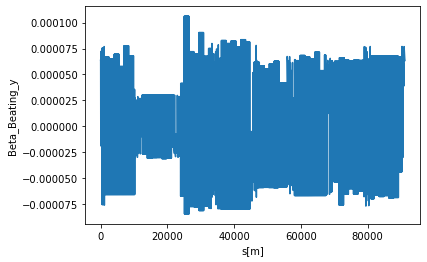

RMS beta beat, x:0.003198459657929239%   y: 0.004993455131864144%
STD beta beat, x:0.0031971020752650015%   y: 0.004992722455735911%
betax_correction reduction 98.54634919945643
betax_correction reduction 97.01620488848644
iteration3:
Execution time define matrices function: 1.3034884929656982 sec
Execution time get inverse: 0.006167888641357422 sec
Execution time set correction: 0.012781620025634766 sec
beta beating with errors


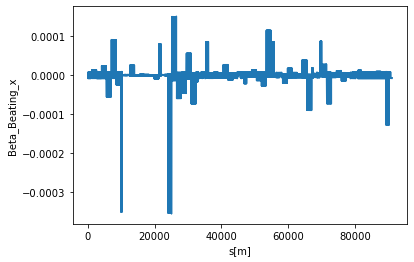

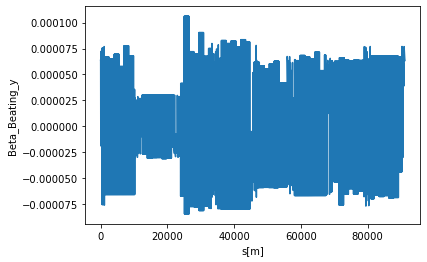

RMS beta beat, x:0.003198459657929239%   y: 0.004993455131864144%
STD beta beat, x:0.0031971020752650015%   y: 0.004992722455735911%
beta beating after corrections


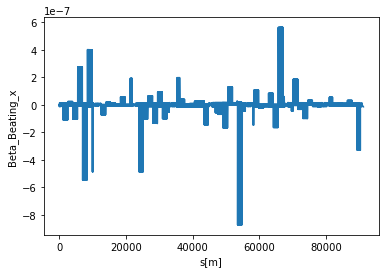

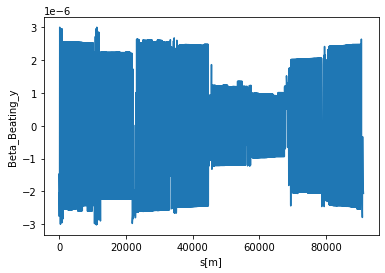

RMS beta beat, x:9.734062945999223e-06%   y: 0.00017215379561149604%
STD beta beat, x:9.721672301757214e-06%   y: 0.00017207500049463073%
betax_correction reduction 99.69566403872352
betax_correction reduction 96.55241128506489
iteration4:
Execution time define matrices function: 0.8885915279388428 sec
Execution time get inverse: 0.003991127014160156 sec
Execution time set correction: 0.0069789886474609375 sec
beta beating with errors


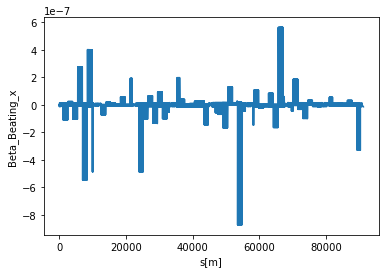

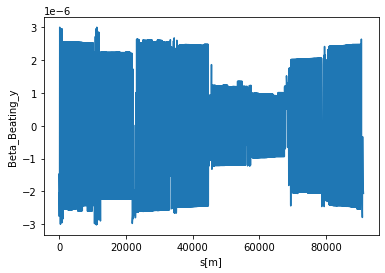

RMS beta beat, x:9.734062945999223e-06%   y: 0.00017215379561149604%
STD beta beat, x:9.721672301757214e-06%   y: 0.00017207500049463073%
beta beating after corrections


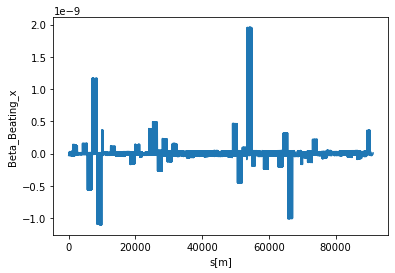

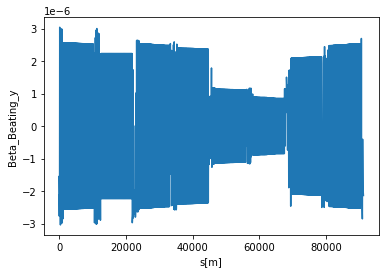

RMS beta beat, x:1.9915515393817932e-08%   y: 0.0001715692255225199%
STD beta beat, x:1.990607039928224e-08%   y: 0.00017148272884386098%
betax_correction reduction 99.79540387704188
betax_correction reduction 0.3395627072291574


In [12]:
numberOfIteration = 5
for x in range(numberOfIteration):
    print('iteration'+str(x) +':')
    twiss_error0 = getOptics(ring, at.elements.Monitor, BPMs_random_noise)

    Cxx1, Cxy1= ORM_x(1.e-6, ring, BPMs_random_noise, used_correctors)
    Cyy1, Cyx1= ORM_y(1.e-6, ring, BPMs_random_noise, used_correctors)

    t0 = time.time()
    A, B = defineMatrices(C0x, C0y, C0xy, C0yx, Cxx1, Cyy1, Cxy1, Cyx1, dCx, dCy, dCxy,dCyx)
    t1 = time.time()
    print(f"Execution time define matrices function: {t1-t0} sec")
    Nk = len(dCx)
    cut = 104
    t0 = time.time()
    r= getInverse(A, B,Nk, cut)
    t1 = time.time()
    print(f"Execution time get inverse: {t1-t0} sec")
    #print("r................", r)
    t0 = time.time()
    setCorrection(ring, r , used_quadrpoles_families_ind)
    t1 = time.time()
    print(f"Execution time set correction: {t1-t0} sec")
    twiss_corr = getOptics(ring, at.elements.Monitor, BPMs_random_noise)
    print('beta beating with errors')
    bx_rms1, by_rms1 = getBetaBeat(twiss, twiss_error0)
    print('beta beating after corrections')
    bx_rms2, by_rms2= getBetaBeat(twiss, twiss_corr)
    print('betax_correction reduction', (1-bx_rms2/bx_rms1)*100)
    print('betax_correction reduction', (1-by_rms2/by_rms1)*100)
    #Cxx2, Cxy2= ORM_x(1.e-6, ring, BPMs_random_noise, CfamilyNames = used_correctors)
    #Cyy2, Cyx2= ORM_y(1.e-6, ring, BPMs_random_noise, CfamilyNames = used_correctors)

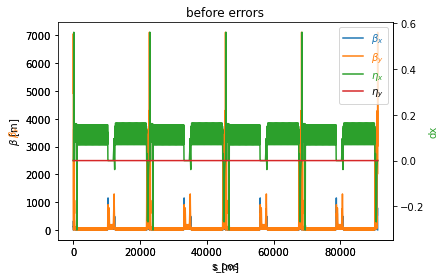

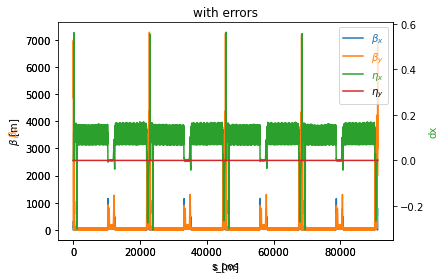

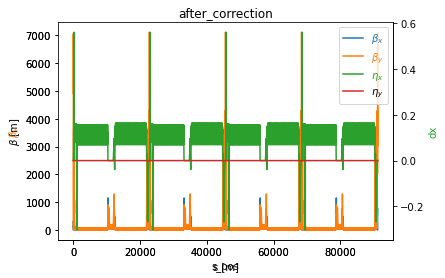

In [13]:
make_plot_all2(twiss, 'before errors')
make_plot_all2(twiss_err, 'with errors')
make_plot_all2(twiss_corr, 'after_correction')

In [14]:
t1_fullCode = time.time()
print(f"Execution time: {t1_fullCode-t0_fullCode} sec")

Execution time: 1258.2548084259033 sec
